In [22]:
import json
from PIL import Image, ImageDraw

In [23]:
with open('../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000000_000019_gtFine_polygons.json', 'r') as f:
    json_file = json.load(f)

In [24]:
# récuperer les différents label dans le json
color_tab = []
for ob in json_file['objects']:
    color_tab.append(ob['label'])

In [25]:
# supprimer les doublons
color_tab = set(color_tab)
color_tab = list(color_tab)
color_tab

['sidewalk',
 'out of roi',
 'bicycle',
 'person',
 'ego vehicle',
 'building',
 'car',
 'terrain',
 'road',
 'sky',
 'static',
 'license plate',
 'rider',
 'vegetation',
 'traffic sign',
 'pole']

In [26]:
# attribuer une couleur à chaque label
colors_label = {
    'ego vehicle': (31, 119, 181),
    'car': (255, 127, 14),
    'bicycle': (44, 160, 44),
    'traffic sign': (214, 39, 40),
    'static': (148, 103, 189),
    'out of roi': (140, 86, 75),
    'building': (227, 119, 194),
    'sky': (127, 127, 127),
    'road': (188, 189, 34),
    'rider': (23, 190, 207),
    'person': (31, 119, 181),
    'license plate': (174, 199, 232),
    'vegetation': (230, 158, 0),
    'pole': (166, 86, 40),
    'sidewalk': (102, 102, 102),
    'terrain': (0, 255, 0)
}

In [32]:
# boucle de dessin

image = Image.open("../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png")

draw = ImageDraw.Draw(image)

for object in json_file['objects']: # on cherche le label de polygon ex. road
    for color_label in colors_label: # on cherche le nom du label de couleur ex. road
        if object['label'] == color_label:
            fill_color = colors_label[color_label]
    polygon_annotation = []
    for x, y in object['polygon']:
        polygon_annotation.append((x, y))
    draw.polygon(polygon_annotation, fill=fill_color)


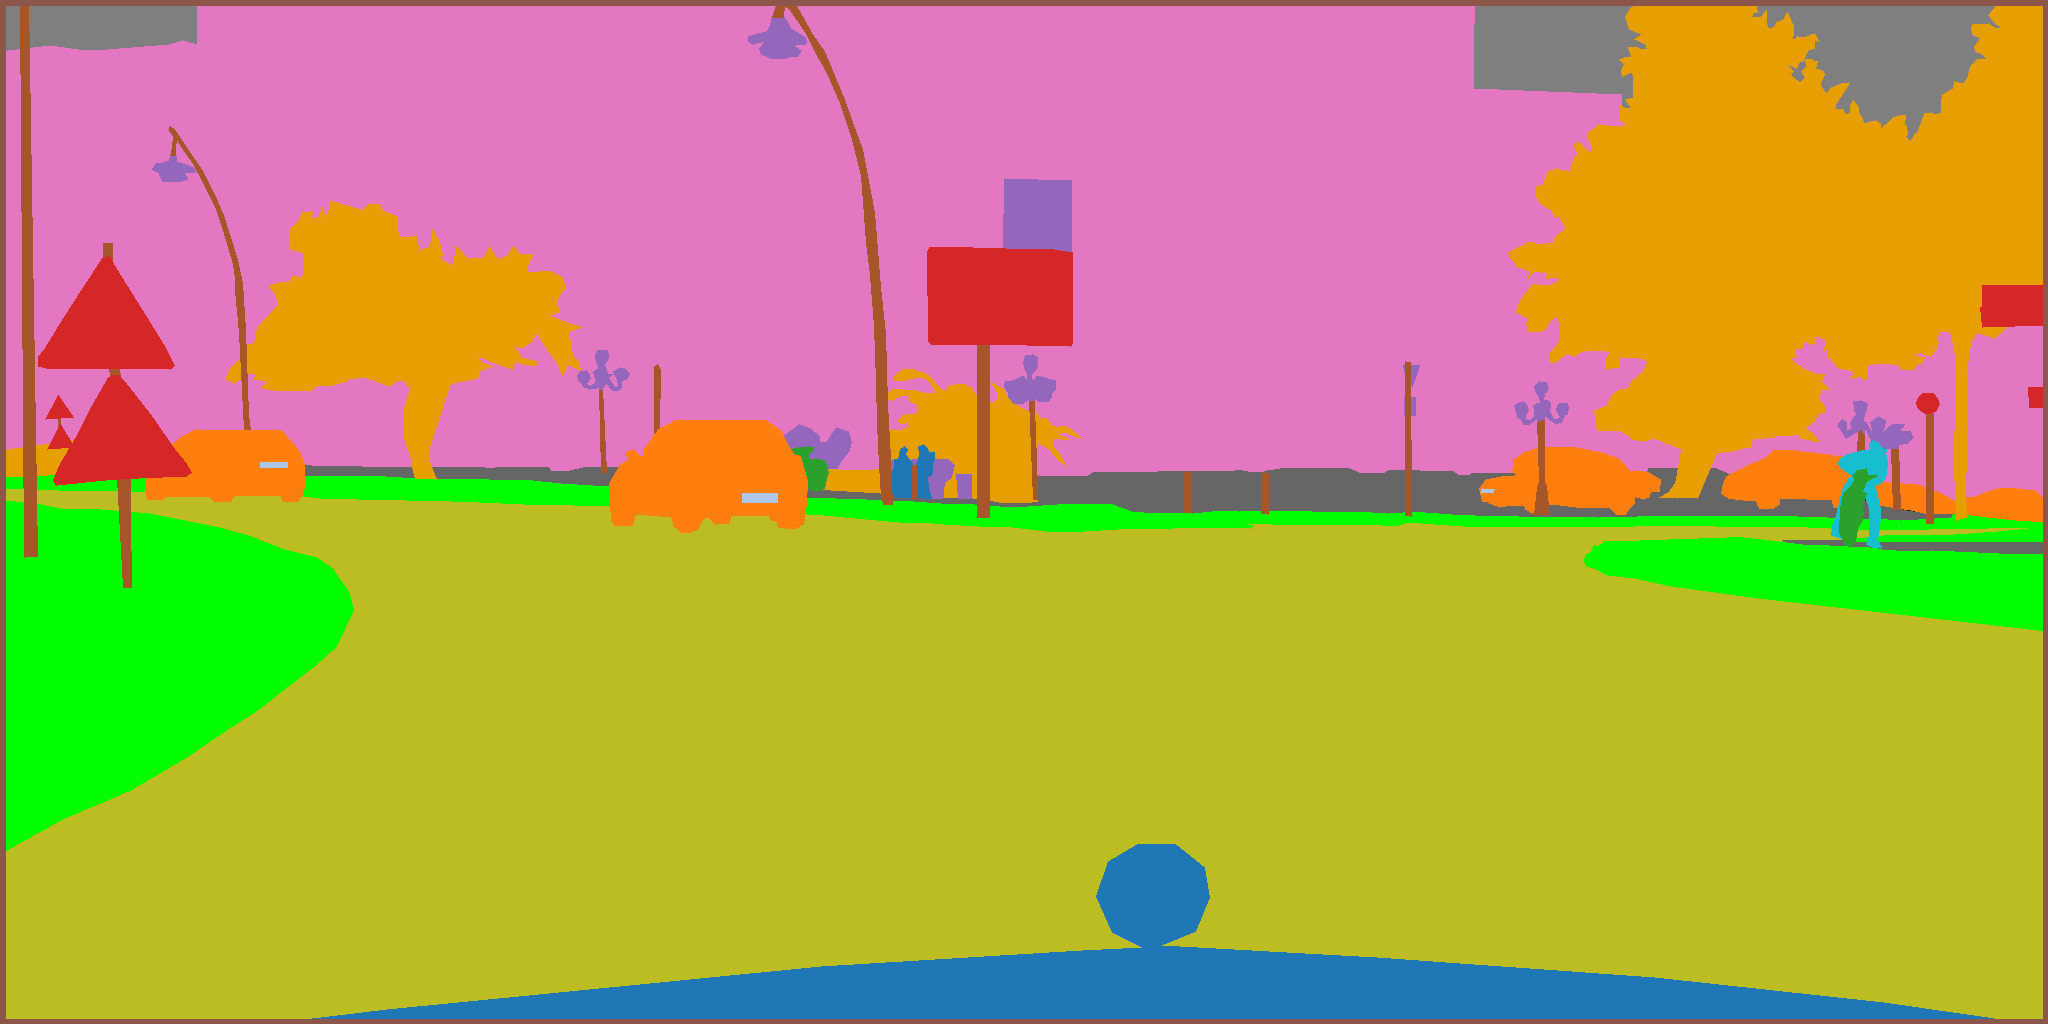

In [33]:
image